In [1]:
# Useful for defining quantities
from astropy import units as u

# Earth focused modules, ISS example orbit and time span generator
from poliastro.earth import EarthSatellite
from poliastro.earth.plotting import GroundtrackPlotter
from poliastro.examples import iss
from poliastro.util import time_range

In [15]:
# Build spacecraft instance
iss_spacecraft = EarthSatellite(iss, None)
t_span = time_range(
    iss.epoch - 1.5 * u.h, periods=150, end=iss.epoch + 4.5 * u.h
)

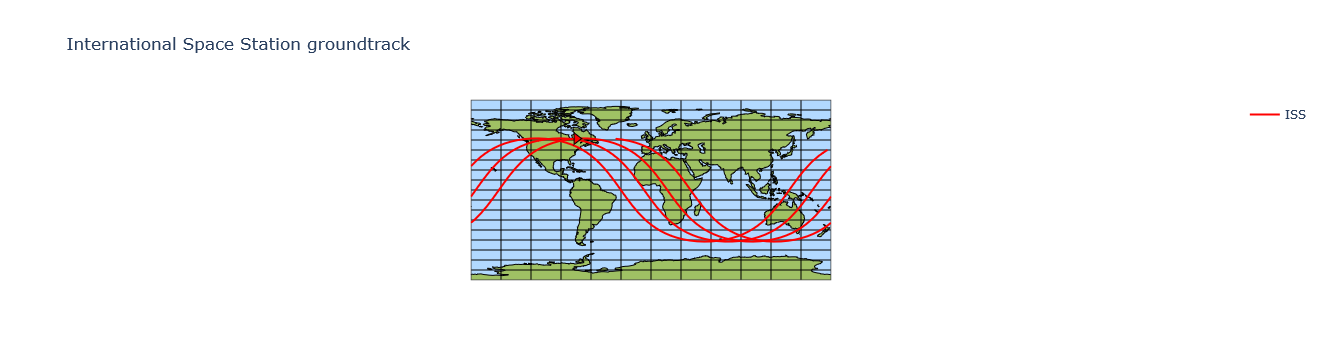

In [16]:
# Generate an instance of the plotter, add title and show latlon grid
gp = GroundtrackPlotter()
gp.update_layout(title="International Space Station groundtrack")

# Plot previously defined EarthSatellite object
gp.plot(
    iss_spacecraft,
    t_span,
    label="ISS",
    color="red",
    marker={
        "size": 10,
        "symbol": "triangle-right",
        "line": {"width": 1, "color": "black"},
    },
)


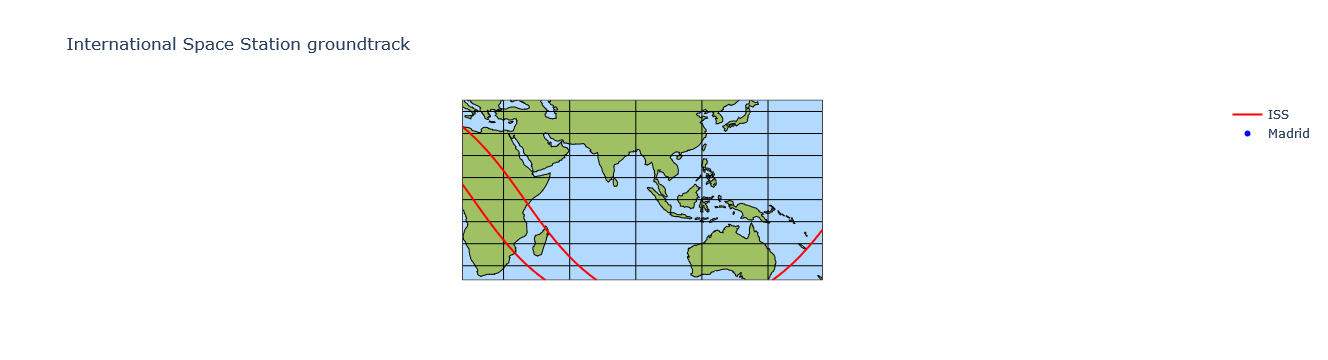

In [12]:
# For building geo traces
import plotly.graph_objects as go

# Position in [LAT LON]
STATION = [40.416729, -3.703339] * u.deg

# Let us add a new trace in original figure
gp.add_trace(
    go.Scattergeo(
        lat=STATION[0],
        lon=STATION[-1],
        name="Madrid",
        marker={"color": "blue"},
    )
)
gp.fig.show()


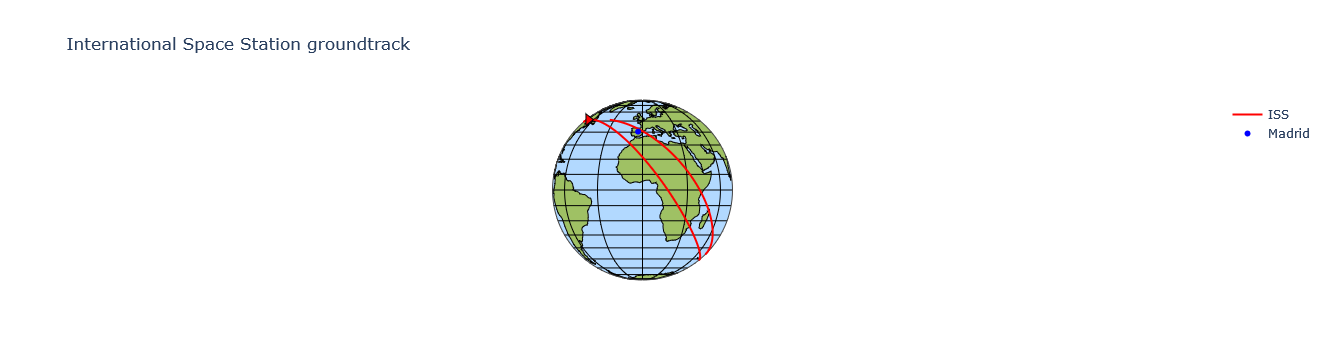

In [13]:
# Switch to three dimensional representation
gp.update_geos(projection_type="orthographic")
gp.fig.show()


In [14]:
iss_spacecraft(